In [1]:
import yfinance as yf
from mplchart.chart import Chart
from mplchart.primitives import Candlesticks, Volume, ChartPattern, ScanProperties

ticker = "AAPL"
prices = yf.Ticker(ticker).history(period="2y")

Points: 431, 460, 475 on the same line, cos_diff=5.399218142576601e-07
Chose points: 460, 475
Points: 358, 382, 402 on the same line, cos_diff=7.498558296514801e-08
Chose points: 382, 402
Points: 298, 308, 337 on the same line, cos_diff=4.0095663811356985e-07
Chose points: 308, 337
Points: 228, 257, 272 on the same line, cos_diff=1.6252326173749054e-07
Chose points: 228, 272
Points: 101, 111, 162 on the same line, cos_diff=8.822256039042742e-07
Chose points: 111, 162
Points: 91, 101, 111 on the same line, cos_diff=1.8632290788023198e-07
Chose points: 101, 111
Points: 33, 73, 91 on the same line, cos_diff=9.178995967751291e-07
Chose points: 73, 91
Points: 20, 55, 87 on the same line, cos_diff=9.312732129895807e-08
Chose points: 20, 87


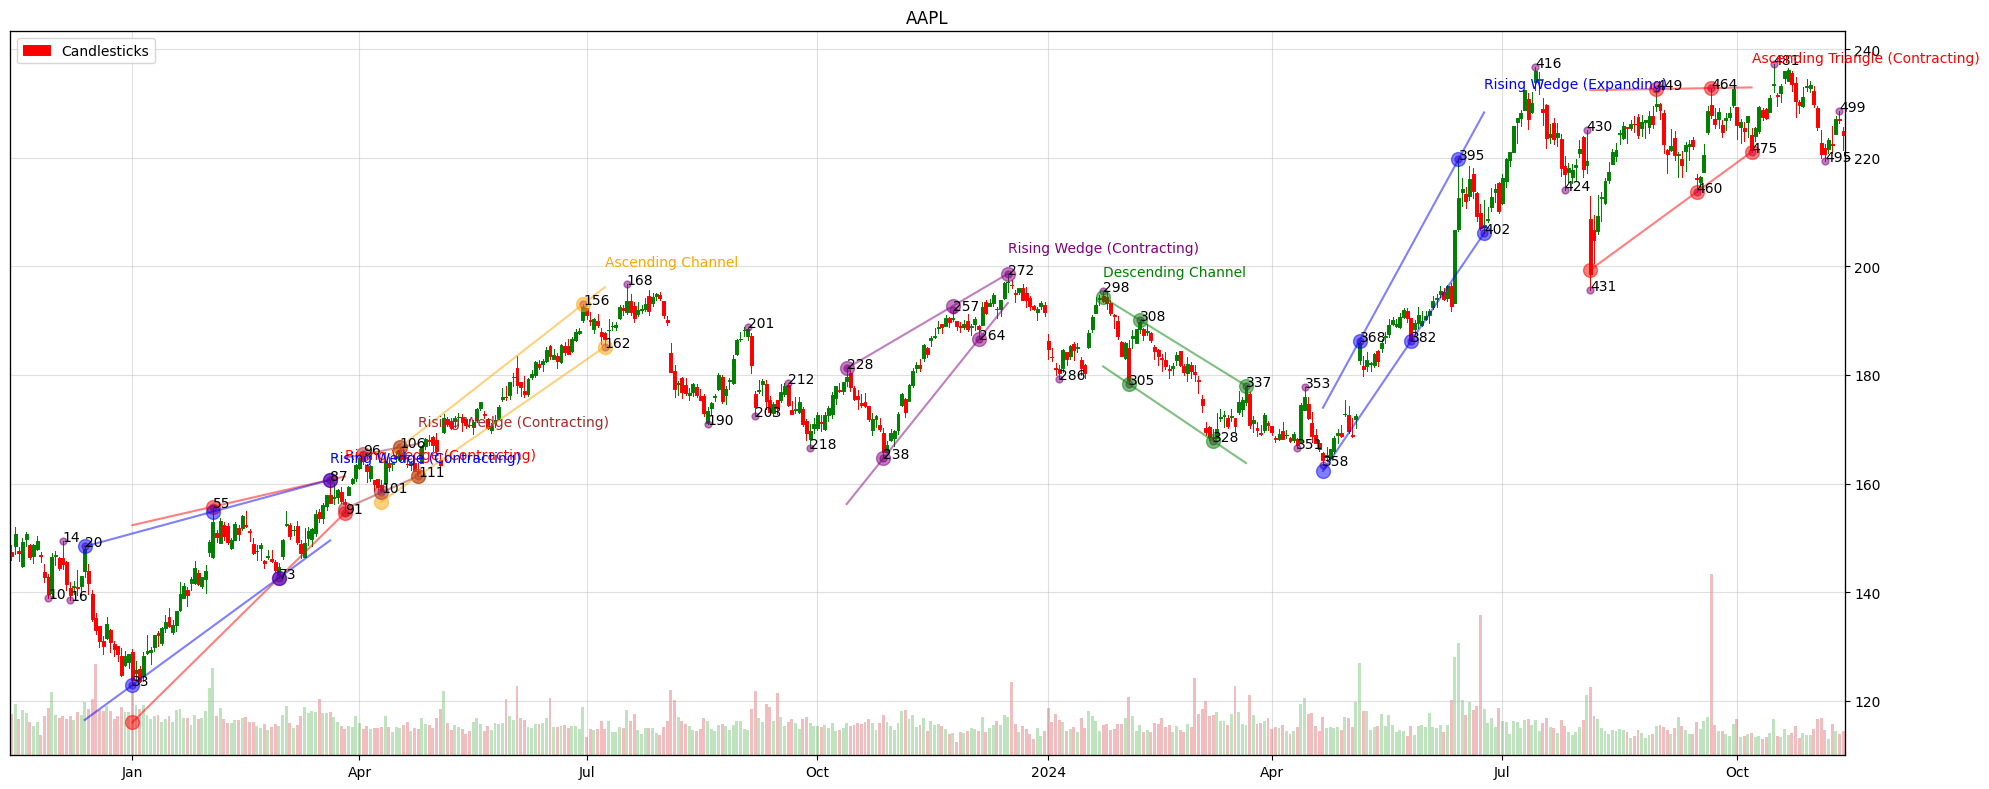

In [2]:
# Configure pattern scanning
scan_props = ScanProperties(
        number_of_pivots=5,
        error_ratio=1e-6,
    )


indicators = [
    Candlesticks(colorup="green", colordn="red"),
    Volume(),
    #ChartPattern(backcandels=2, forwardcandels=2, pivot_limit=100, show_pivots=True, scan_props=scan_props),
    ChartPattern(backcandels=5, forwardcandels=5, pivot_limit=50, show_pivots=True, scan_props=scan_props),
    # SMA(50),
    # SMA(200),
    # RSI(),
    # MACD(),
]

chart = Chart(title=ticker, figsize=(20, 8))
chart.plot(prices, indicators)


## Debug Zigzag

In [ ]:
from mplchart.zigzag import Zigzag

zigzag = Zigzag(backcandels=2, forwardcandels=2, pivot_limit=55, offset=0)
prices["high"] = prices["High"]
prices["low"] = prices["Low"]
prices["close"] = prices["Close"]
zigzag.calculate(prices)

for pivot in zigzag.zigzag_pivots:
    print(f"Pivot: time={pivot.point.time}, index={pivot.point.index}, price={pivot.point.price}")
print(f"Number of pivots: {len(zigzag.zigzag_pivots)}")